## Joining tables
In  pandas two tables can joins mainly 4 types:
1. inner joins `pd.merge(df1,df2,on = 'city', how = 'inner')   # how = 'inner' default value`
2. outer joins `pd.merge(df1,df2,on = 'city', how = 'outer')`
3. left joins `pd.merge(df1,df2,on = 'city', how = 'left')`
4. right joins `pd.merge(df1,df2,on = 'city', how = 'right')`

In [37]:
import pandas as pd

df1 = pd.DataFrame({'city': ['Delhi', 'Mumbai', 'Chennai'], 'Temperature': [38, 32, 35]})
df2 = pd.DataFrame({'city': ['Mumbai', 'Delhi', 'Bangalore'], 'Humidity': [22, 48, 55]})
df1

,city,Temperature
0,Delhi,38
1,Mumbai,32
2,Chennai,35


In [38]:
df2

,city,Humidity
0,Mumbai,22
1,Delhi,48
2,Bangalore,55


In [39]:
pd.merge(df1,df2)

,city,Temperature,Humidity
0,Delhi,38,48
1,Mumbai,32,22


In [40]:
pd.merge(df1,df2, on = 'city', how = 'inner')

,city,Temperature,Humidity
0,Delhi,38,48
1,Mumbai,32,22


## inner joins
An inner join returns only the matching rows from both data frames based on the common column, which is 'city' in this case. Since 'Chennai' and 'Bangalore' are not present in both data frames, those rows will be excluded from the result.

In [46]:
# pd.merge(df1,df2,on= 'city')
pd.merge(df1,df2,on= 'city',how = 'inner')

,city,Temperature,Humidity
0,Delhi,38,48
1,Mumbai,32,22


## outer joins
An outer join returns all rows from both data frames, filling in missing values with NaN (null) if there is no match based on the common column.

In [48]:
pd.merge(df1,df2,on = 'city', how = 'outer')

,city,Temperature,Humidity
0,Delhi,38.0,48.0
1,Mumbai,32.0,22.0
2,Chennai,35.0,NaN
3,Bangalore,NaN,55.0


## left joins
A left join returns all rows from the left data frame (df1) and the matching rows from the right data frame (df2). If there is no match, the missing values are filled with NaN.

In [ ]:
pd.merge(df1,df2, on = 'city',how = 'left')


## right joins
A right join returns all rows from the right data frame (df2) and the matching rows from the left data frame (df1). If there is no match, the missing values are filled with NaN.

In [45]:
pd.merge(df1,df2, on = 'city',how = 'right')

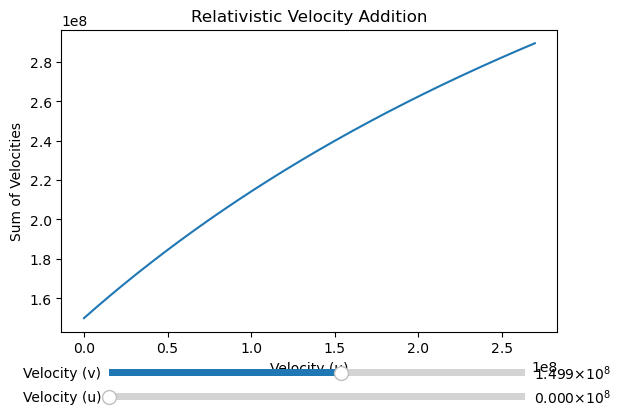

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

class RelativisticVelocitySimulation:
    def __init__(self, speed_of_light):
        self.speed_of_light = speed_of_light

    def velocity_addition(self, u, v):
        sum_vel = (u + v) / (1 + (u * v / self.speed_of_light ** 2))
        return sum_vel

    def update_plot(self, val):
        u = slider_u.val
        v = slider_v.val
        sum_vel = self.velocity_addition(u, v)
        line.set_ydata(sum_vel)
        plt.draw()

# Example usage:
speed_of_light = 299792458  # Speed of light in m/s

relativity = RelativisticVelocitySimulation(speed_of_light)

u_max = 0.9 * speed_of_light  # Maximum velocity (90% of the speed of light)
v = 0.5 * speed_of_light  # Velocity of the second object (50% of the speed of light)

fig, ax = plt.subplots()
plt.subplots_adjust(bottom=0.25)
ax.set_xlabel("Velocity (u)")
ax.set_ylabel("Sum of Velocities")
ax.set_title("Relativistic Velocity Addition")

u_values = np.linspace(0, u_max, 1000)
sum_velocities = [relativity.velocity_addition(u, v) for u in u_values]

line, = plt.plot(u_values, sum_velocities)

axcolor = 'lightgoldenrodyellow'
ax_u = plt.axes([0.2, 0.1, 0.65, 0.03], facecolor=axcolor)
ax_v = plt.axes([0.2, 0.15, 0.65, 0.03], facecolor=axcolor)

slider_u = Slider(ax_u, 'Velocity (u)', 0, u_max, valinit=0)
slider_v = Slider(ax_v, 'Velocity (v)', 0, u_max, valinit=v)

slider_u.on_changed(relativity.update_plot)
slider_v.on_changed(relativity.update_plot)

plt.show()
